In [6]:
import pickle
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 25s 0us/step


In [4]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [10]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

Let's load the labels and add a 'label' column to the dataframes

In [7]:
# from https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
os.listdir('../data')

['meta', 'training_data.dat']

In [21]:
labels = unpickle('../data/meta')
labels = [l.decode('utf-8') for l in labels[b'fine_label_names']]

In [28]:
label_df = pd.DataFrame(labels)

In [29]:
label_df.to_csv('../data/labels.csv', index = False, header = False)

In [33]:
label_df = pd.read_csv('../data/labels.csv', header = None)

In [37]:
# label_df[0].to_list()

In [ ]:
y_train_df['label'] = y_train_df.iloc[:,0].map(lambda x: labels[x])
y_test_df['label'] = y_test_df.iloc[:,0].map(lambda x: labels[x])

Lets explor the distribution of the labels in the training and testing data. There are too many labels to visualize in one histogram so we'll split the training and testing data up into 5 chunks and plot histograms individually.

In [50]:
y_train_df.sort_values(by = 'label', inplace = True)
y_test_df.sort_values(by = 'label', inplace = True)

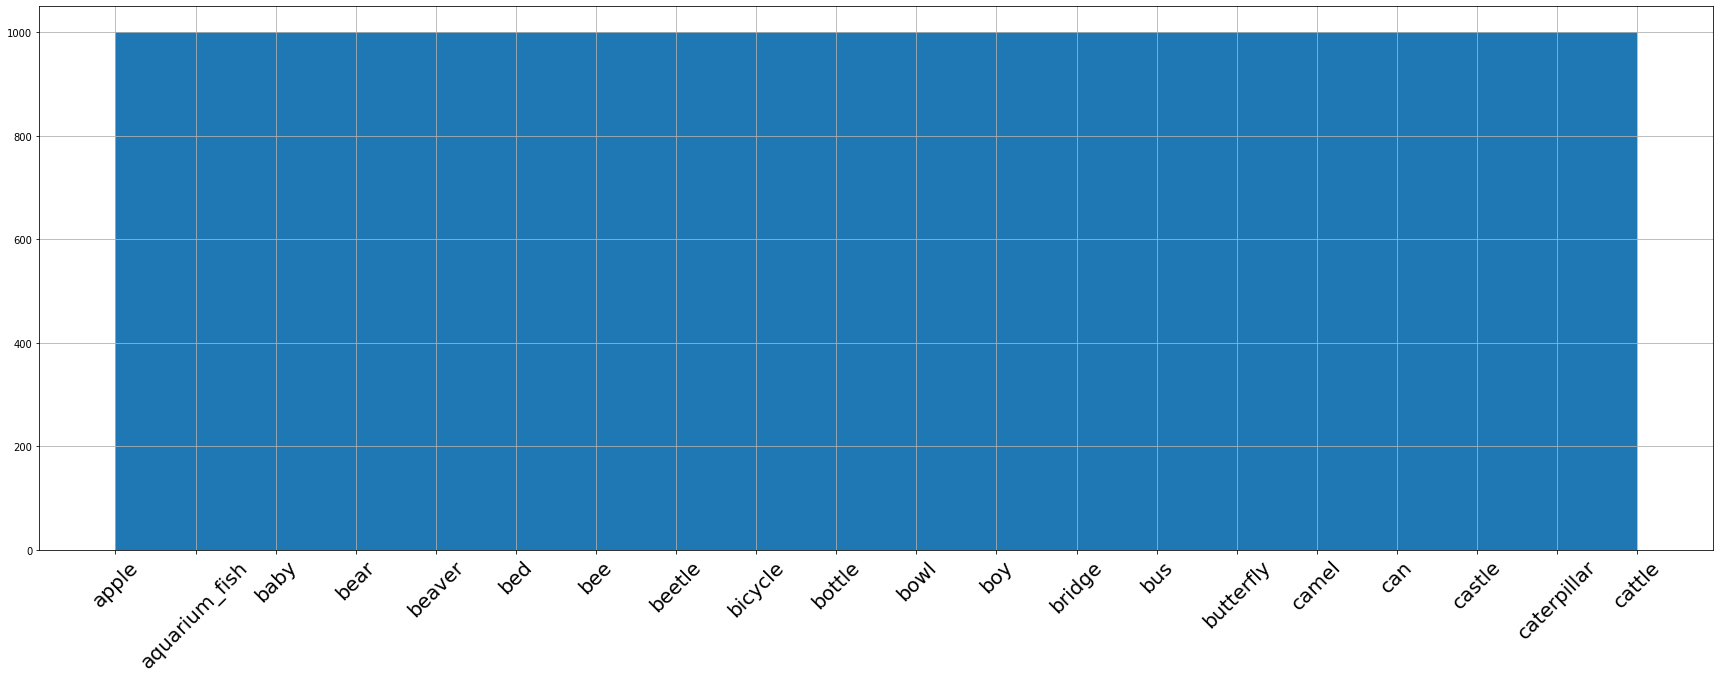

In [57]:
y_train_df.iloc[:10000,1].hist(figsize = [30,10],
                               xlabelsize = 20,
                               xrot = 45)
plt.show()

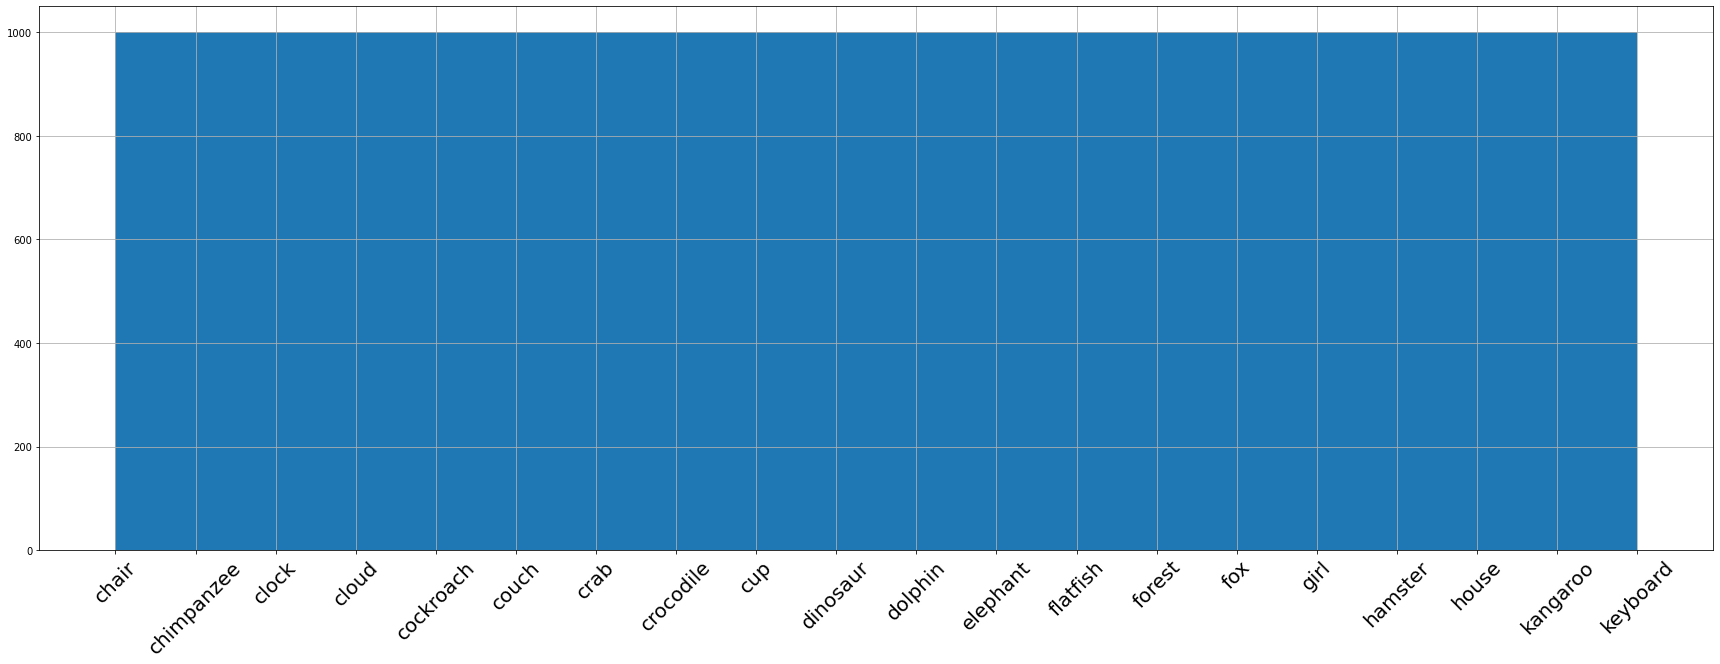

In [58]:
y_train_df.iloc[10000:20000,1].hist(figsize = [30,10],
                                    xlabelsize = 20,
                                    xrot = 45)
plt.show()

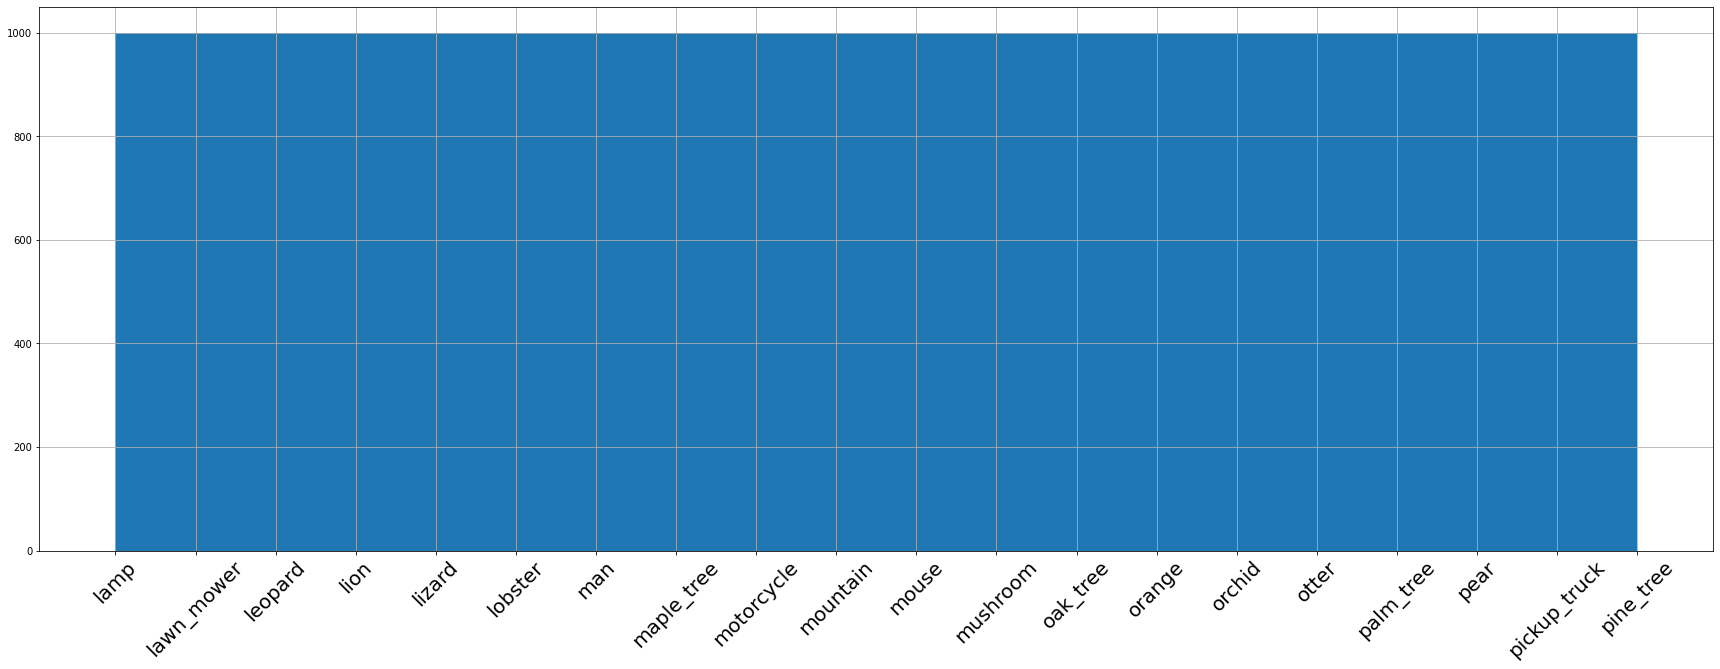

In [59]:
y_train_df.iloc[20000:30000,1].hist(figsize = [30,10],
                                    xlabelsize = 20,
                                    xrot = 45)
plt.show()

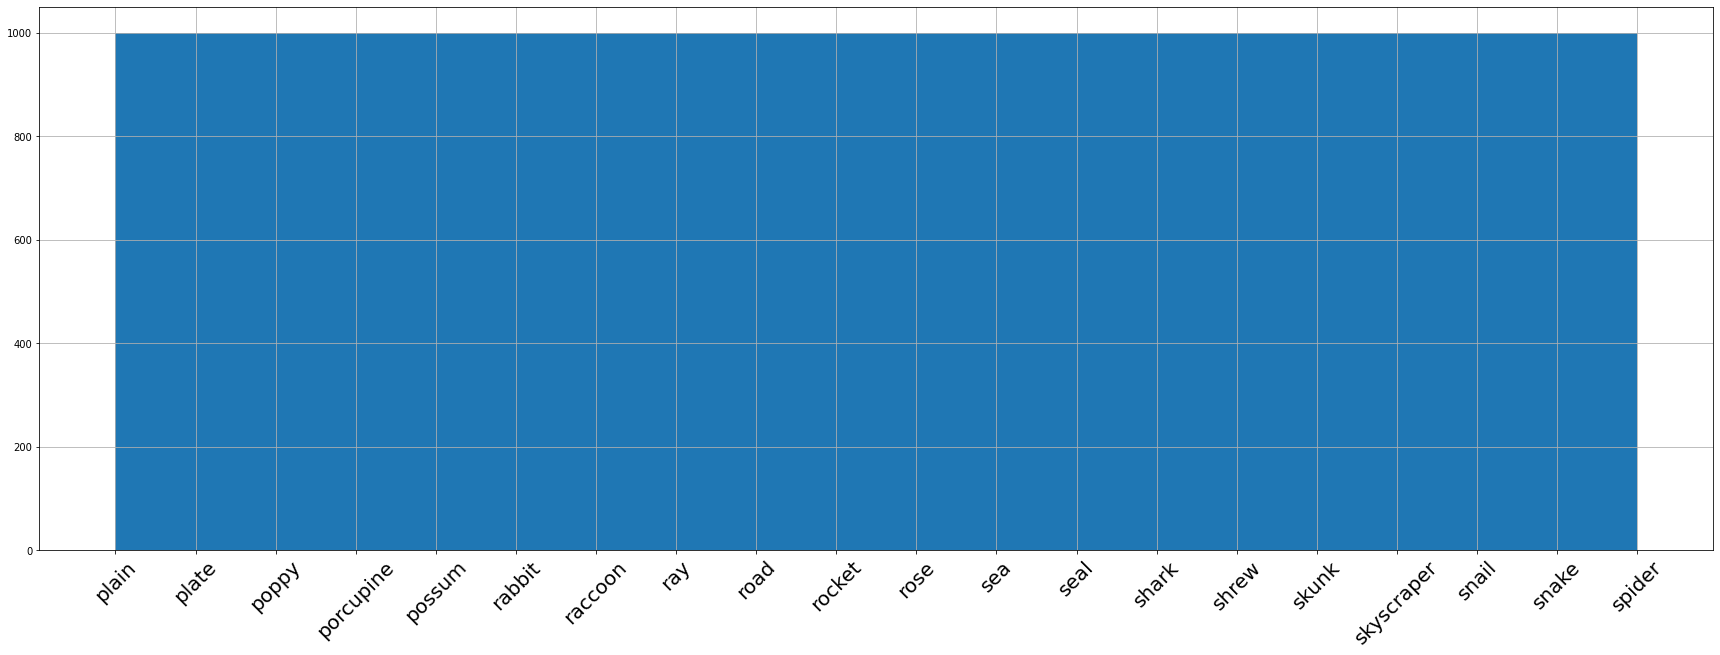

In [60]:
y_train_df.iloc[30000:40000,1].hist(figsize = [30,10],
                                    xlabelsize = 20,
                                    xrot = 45)
plt.show()

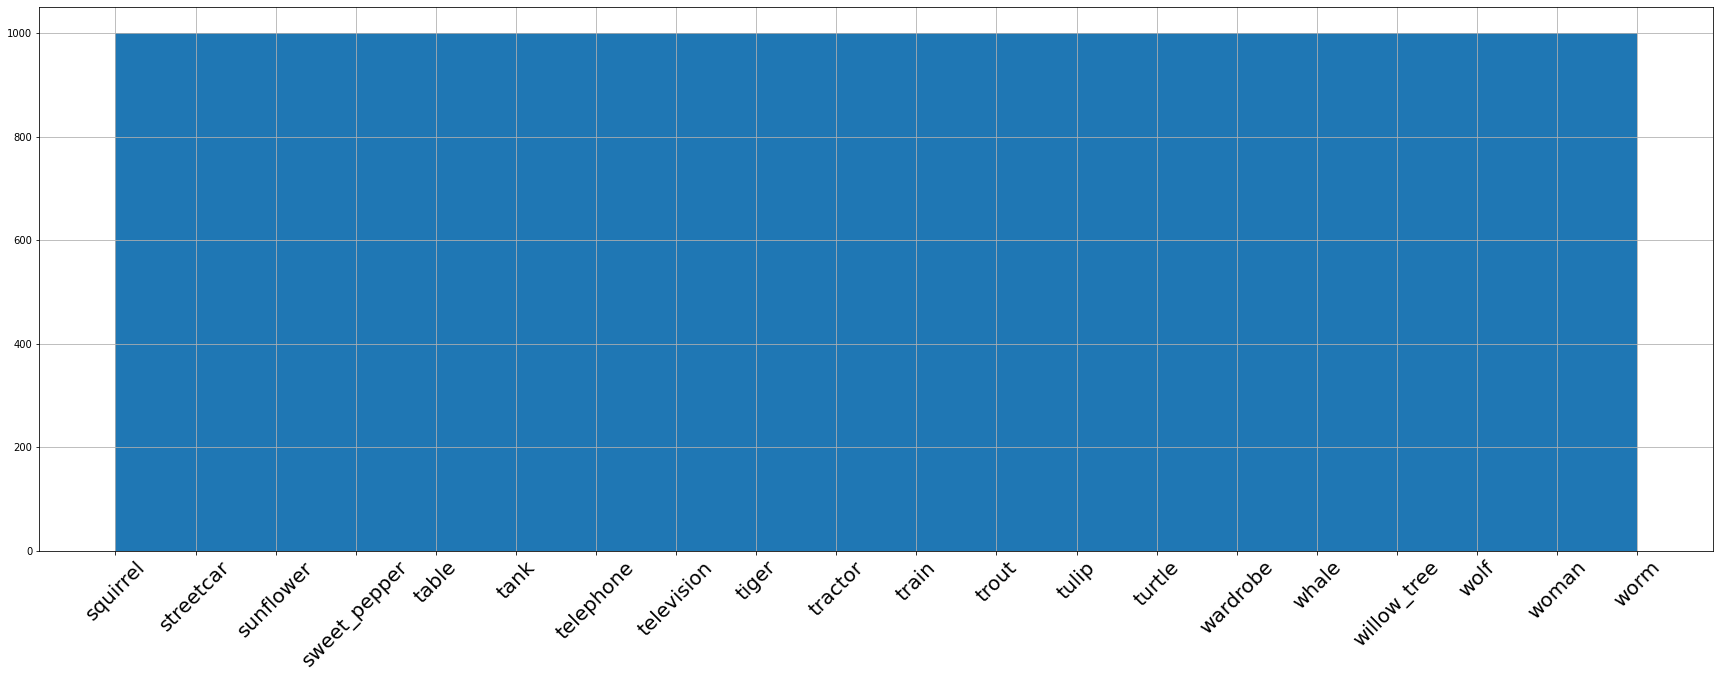

In [61]:
y_train_df.iloc[40000:,1].hist(figsize = [30,10],
                                    xlabelsize = 20,
                                    xrot = 45)
plt.show()

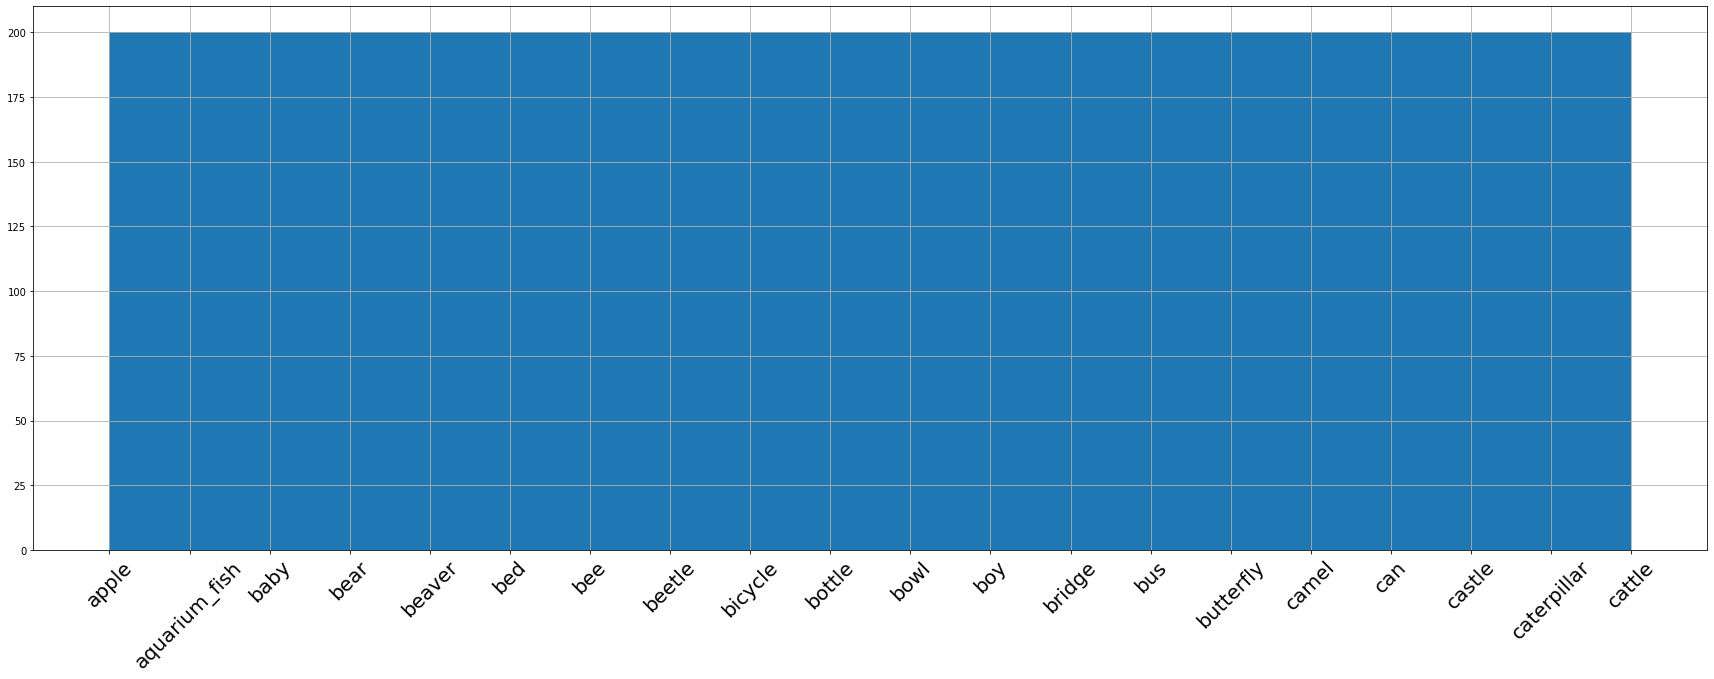

In [62]:
y_test_df.iloc[:2000,1].hist(figsize = [30,10],
                             xlabelsize = 20,
                             xrot = 45)
plt.show()

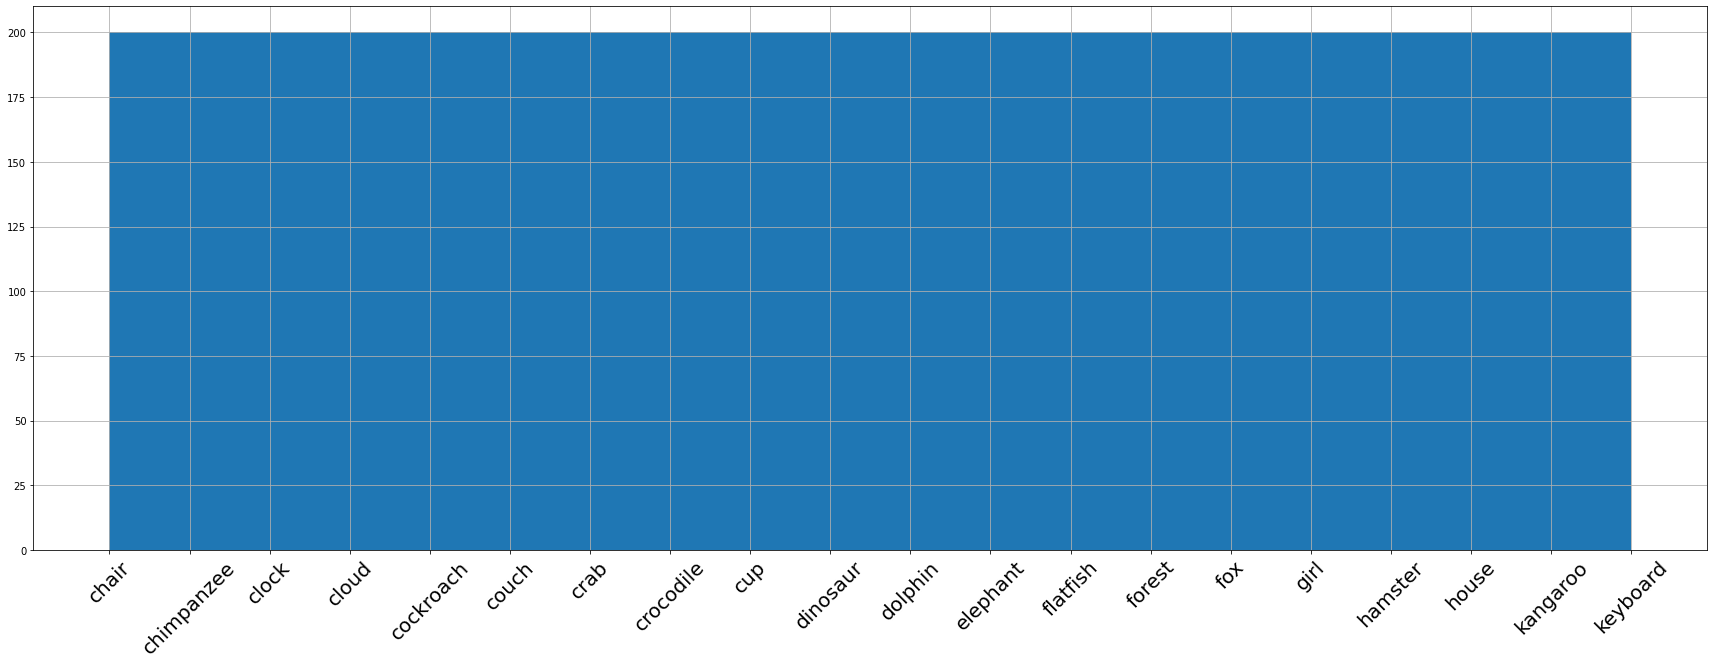

In [63]:
y_test_df.iloc[2000:4000,1].hist(figsize = [30,10],
                                 xlabelsize = 20,
                                 xrot = 45)
plt.show()

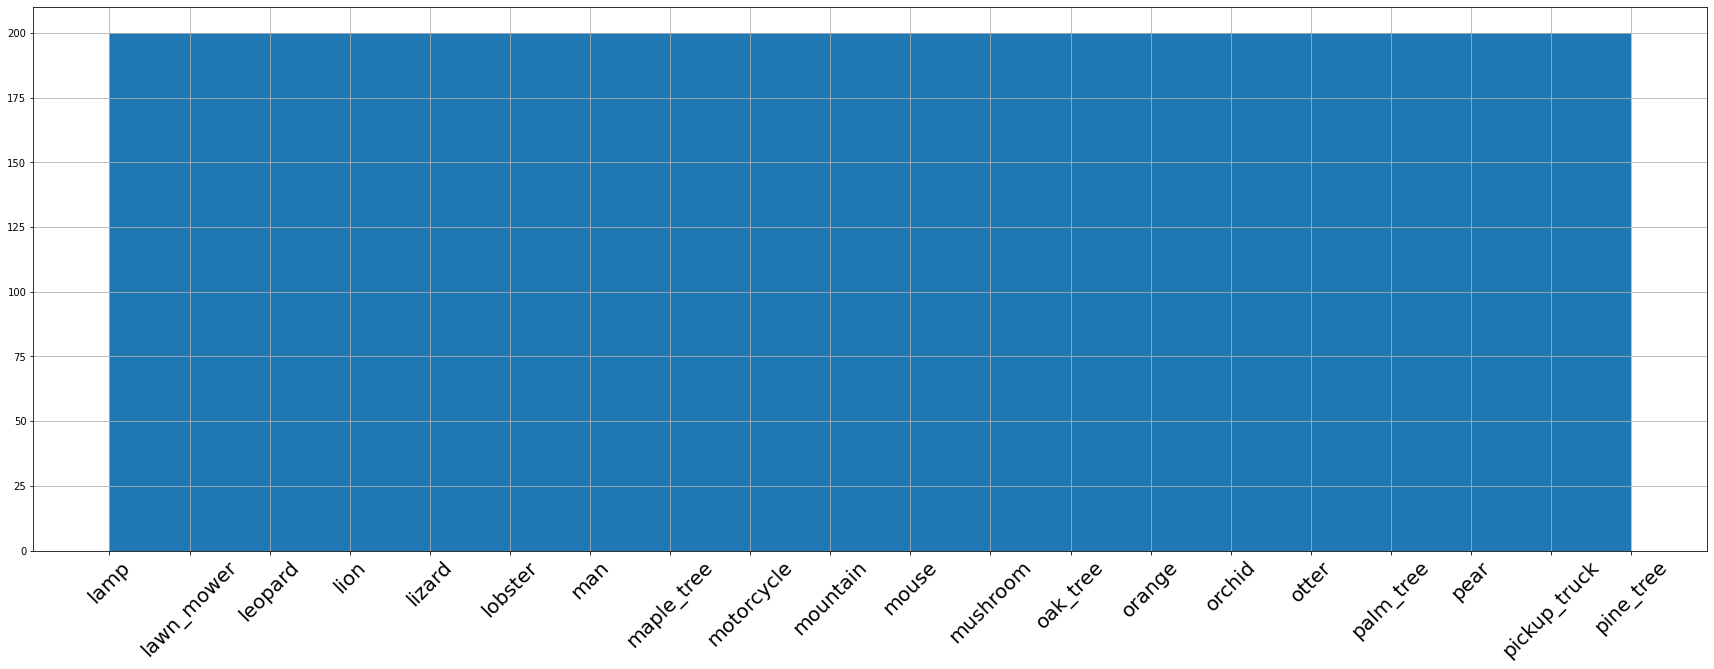

In [64]:
y_test_df.iloc[4000:6000,1].hist(figsize = [30,10],
                                 xlabelsize = 20,
                                 xrot = 45)
plt.show()

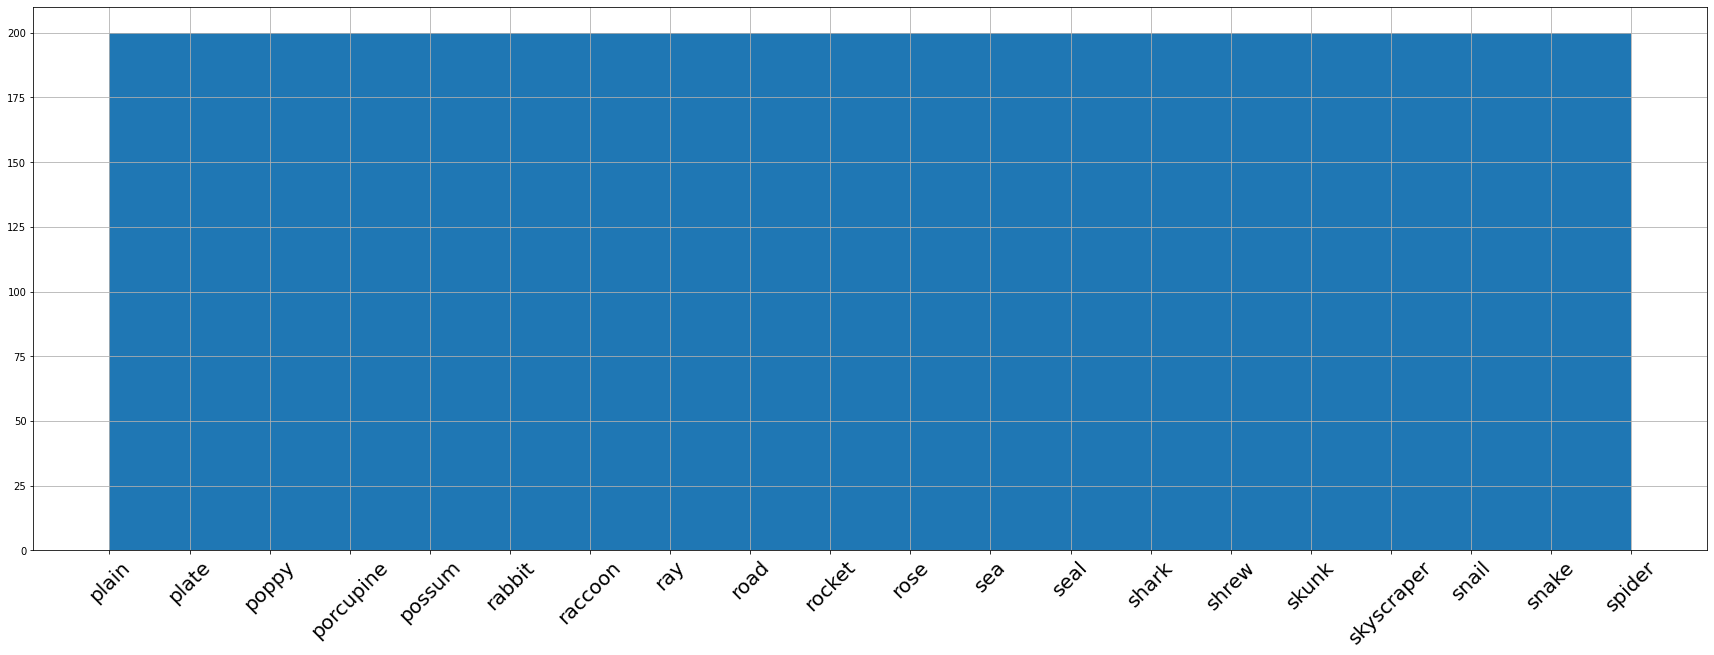

In [65]:
y_test_df.iloc[6000:8000,1].hist(figsize = [30,10],
                                 xlabelsize = 20,
                                 xrot = 45)
plt.show()

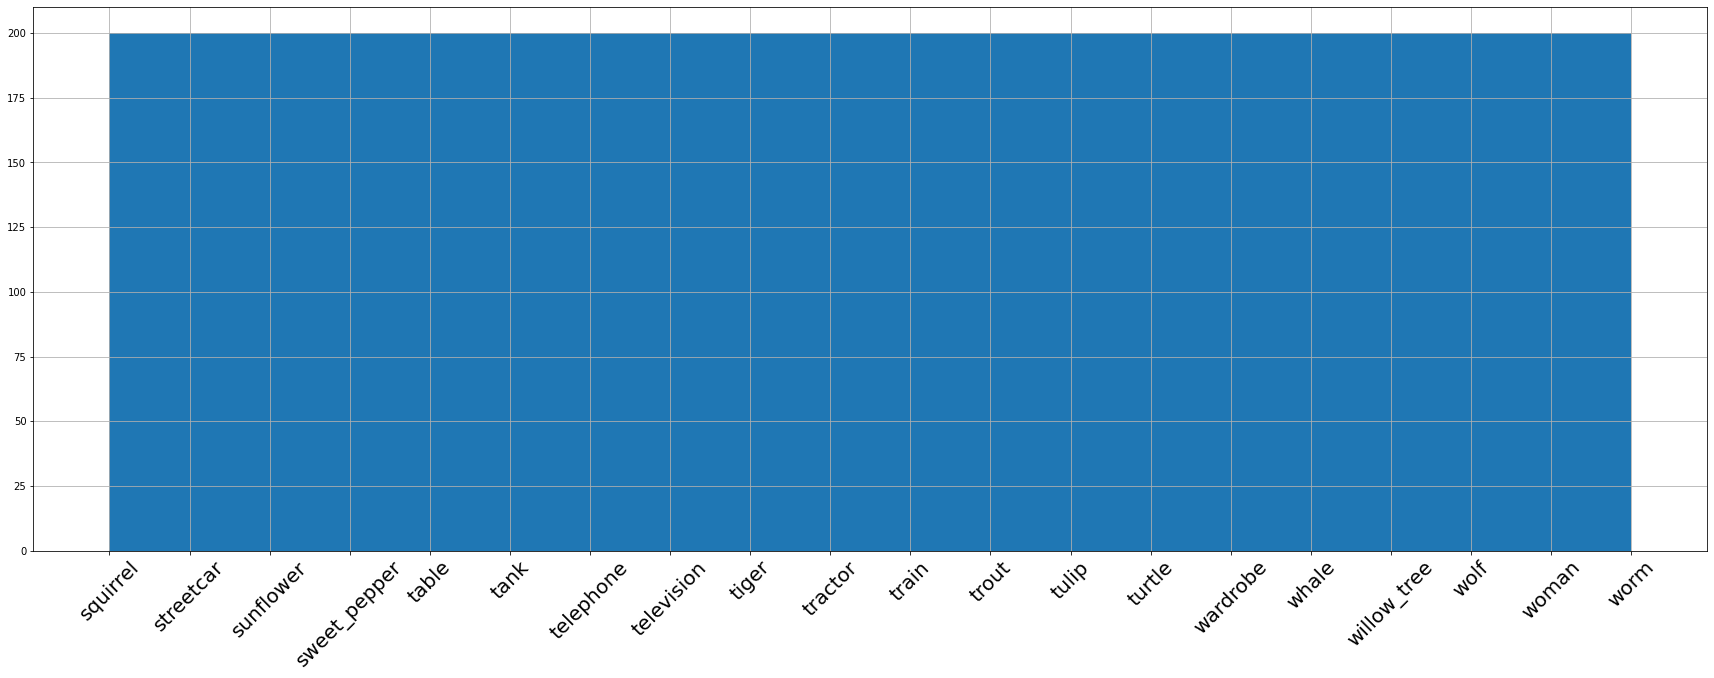

In [66]:
y_test_df.iloc[8000:,1].hist(figsize = [30,10],
                             xlabelsize = 20,
                             xrot = 45)
plt.show()

The distribution of the 100 classes is even in the training and testing data. There should be 500 examples of each class in the training data and 100 in the testing data. We can confirm this by looking at the value counts.

In [69]:
y_train_df.value_counts().to_frame()

,,,0
0,labels,label,
0,apple,apple,500
63,porcupine,porcupine,500
73,shark,shark,500
72,seal,seal,500
71,sea,sea,500
...,...,...,...
30,dolphin,dolphin,500
29,dinosaur,dinosaur,500
28,cup,cup,500


In [70]:
y_test_df.value_counts().to_frame()

,,,0
0,labels,label,
0,apple,apple,100
63,porcupine,porcupine,100
73,shark,shark,100
72,seal,seal,100
71,sea,sea,100
...,...,...,...
30,dolphin,dolphin,100
29,dinosaur,dinosaur,100
28,cup,cup,100


The data looks good to go for training. Training details can be found in the `training.ipynb` notebook.